In [13]:
import numpy as np
import skimage
import utils
import pathlib
import matplotlib.pyplot as plt

In [16]:
def otsu_thresholding(im: np.ndarray) -> int:
    """
        Otsu's thresholding algorithm that segments an image into 1 or 0 (True or False)
        The function takes in a grayscale image and outputs a threshold value

        args:
            im: np.ndarray of shape (H, W) in the range [0, 255] (dtype=np.uint8)
        return:
            (int) the computed thresholding value
    """
    assert im.dtype == np.uint8
    ### START YOUR CODE HERE ### (You can change anything inside this block) 
    # You can also define other helper functions
    
    # Flatten the image
    flat_im = im.flatten()
    
    # Compute histogram
    hist, _ = np.histogram(flat_im, bins=np.arange(257))
    
    # Total number of pixels
    total_pixels = im.size
    
    # Initial variables for optimal thresholding
    best_thresh = 0
    best_variance = 0
    
    # Loop through intensity levels to find optimal threshold
    for threshold in range(256):
        # Class probabilities
        P0 = np.sum(hist[:threshold]) / total_pixels    # class 0
        P1 = np.sum(hist[threshold:]) / total_pixels    # class 1  
        
        # Class mean values (use a threshold of 1e-16 for minimum histogram sum)
        mu0 = np.sum(np.arange(threshold) * hist[:threshold]) / (np.sum(hist[:threshold]) + 1e-16)
        mu1 = np.sum(np.arange(threshold, 256) * hist[threshold:]) / (np.sum(hist[threshold:]) + 1e-16)
        
        # Inter-class variance
        variance = P0 * P1 * ((mu0 - mu1) ** 2)
        
        # Check for maximum inter-class variance
        if variance > best_variance:
            best_variance = variance
            best_thresh = threshold
    
    return best_thresh

In [7]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impaths_to_segment = [
        pathlib.Path("thumbprint.png"),
        pathlib.Path("rice-shaded.png")
    ]
    for impath in impaths_to_segment:
        im = utils.read_image(impath)
        threshold = otsu_thresholding(im)
        print("Found optimal threshold:", threshold)

        # Segment the image by threshold
        segmented_image = (im >= threshold)
        assert im.shape == segmented_image.shape, "Expected image shape ({}) to be same as thresholded image shape ({})".format(
                im.shape, segmented_image.shape)
        assert segmented_image.dtype == bool, "Expected thresholded image dtype to be bool. Was: {}".format(
                segmented_image.dtype)

        segmented_image = utils.to_uint8(segmented_image)

        save_path = "{}-segmented.png".format(impath.stem)
        utils.save_im(save_path, segmented_image)

Reading image: images\thumbprint.png
Found optimal threshold: 154
Saving image to: image_processed\thumbprint-segmented.png
Reading image: images\rice-shaded.png
Found optimal threshold: 135
Saving image to: image_processed\rice-shaded-segmented.png


Reading image: images\thumbprint.png
Found optimal threshold: 154
Reading image: image_processed\thumbprint-segmented.png
Reading image: images\rice-shaded.png
Found optimal threshold: 135
Reading image: image_processed\rice-shaded-segmented.png


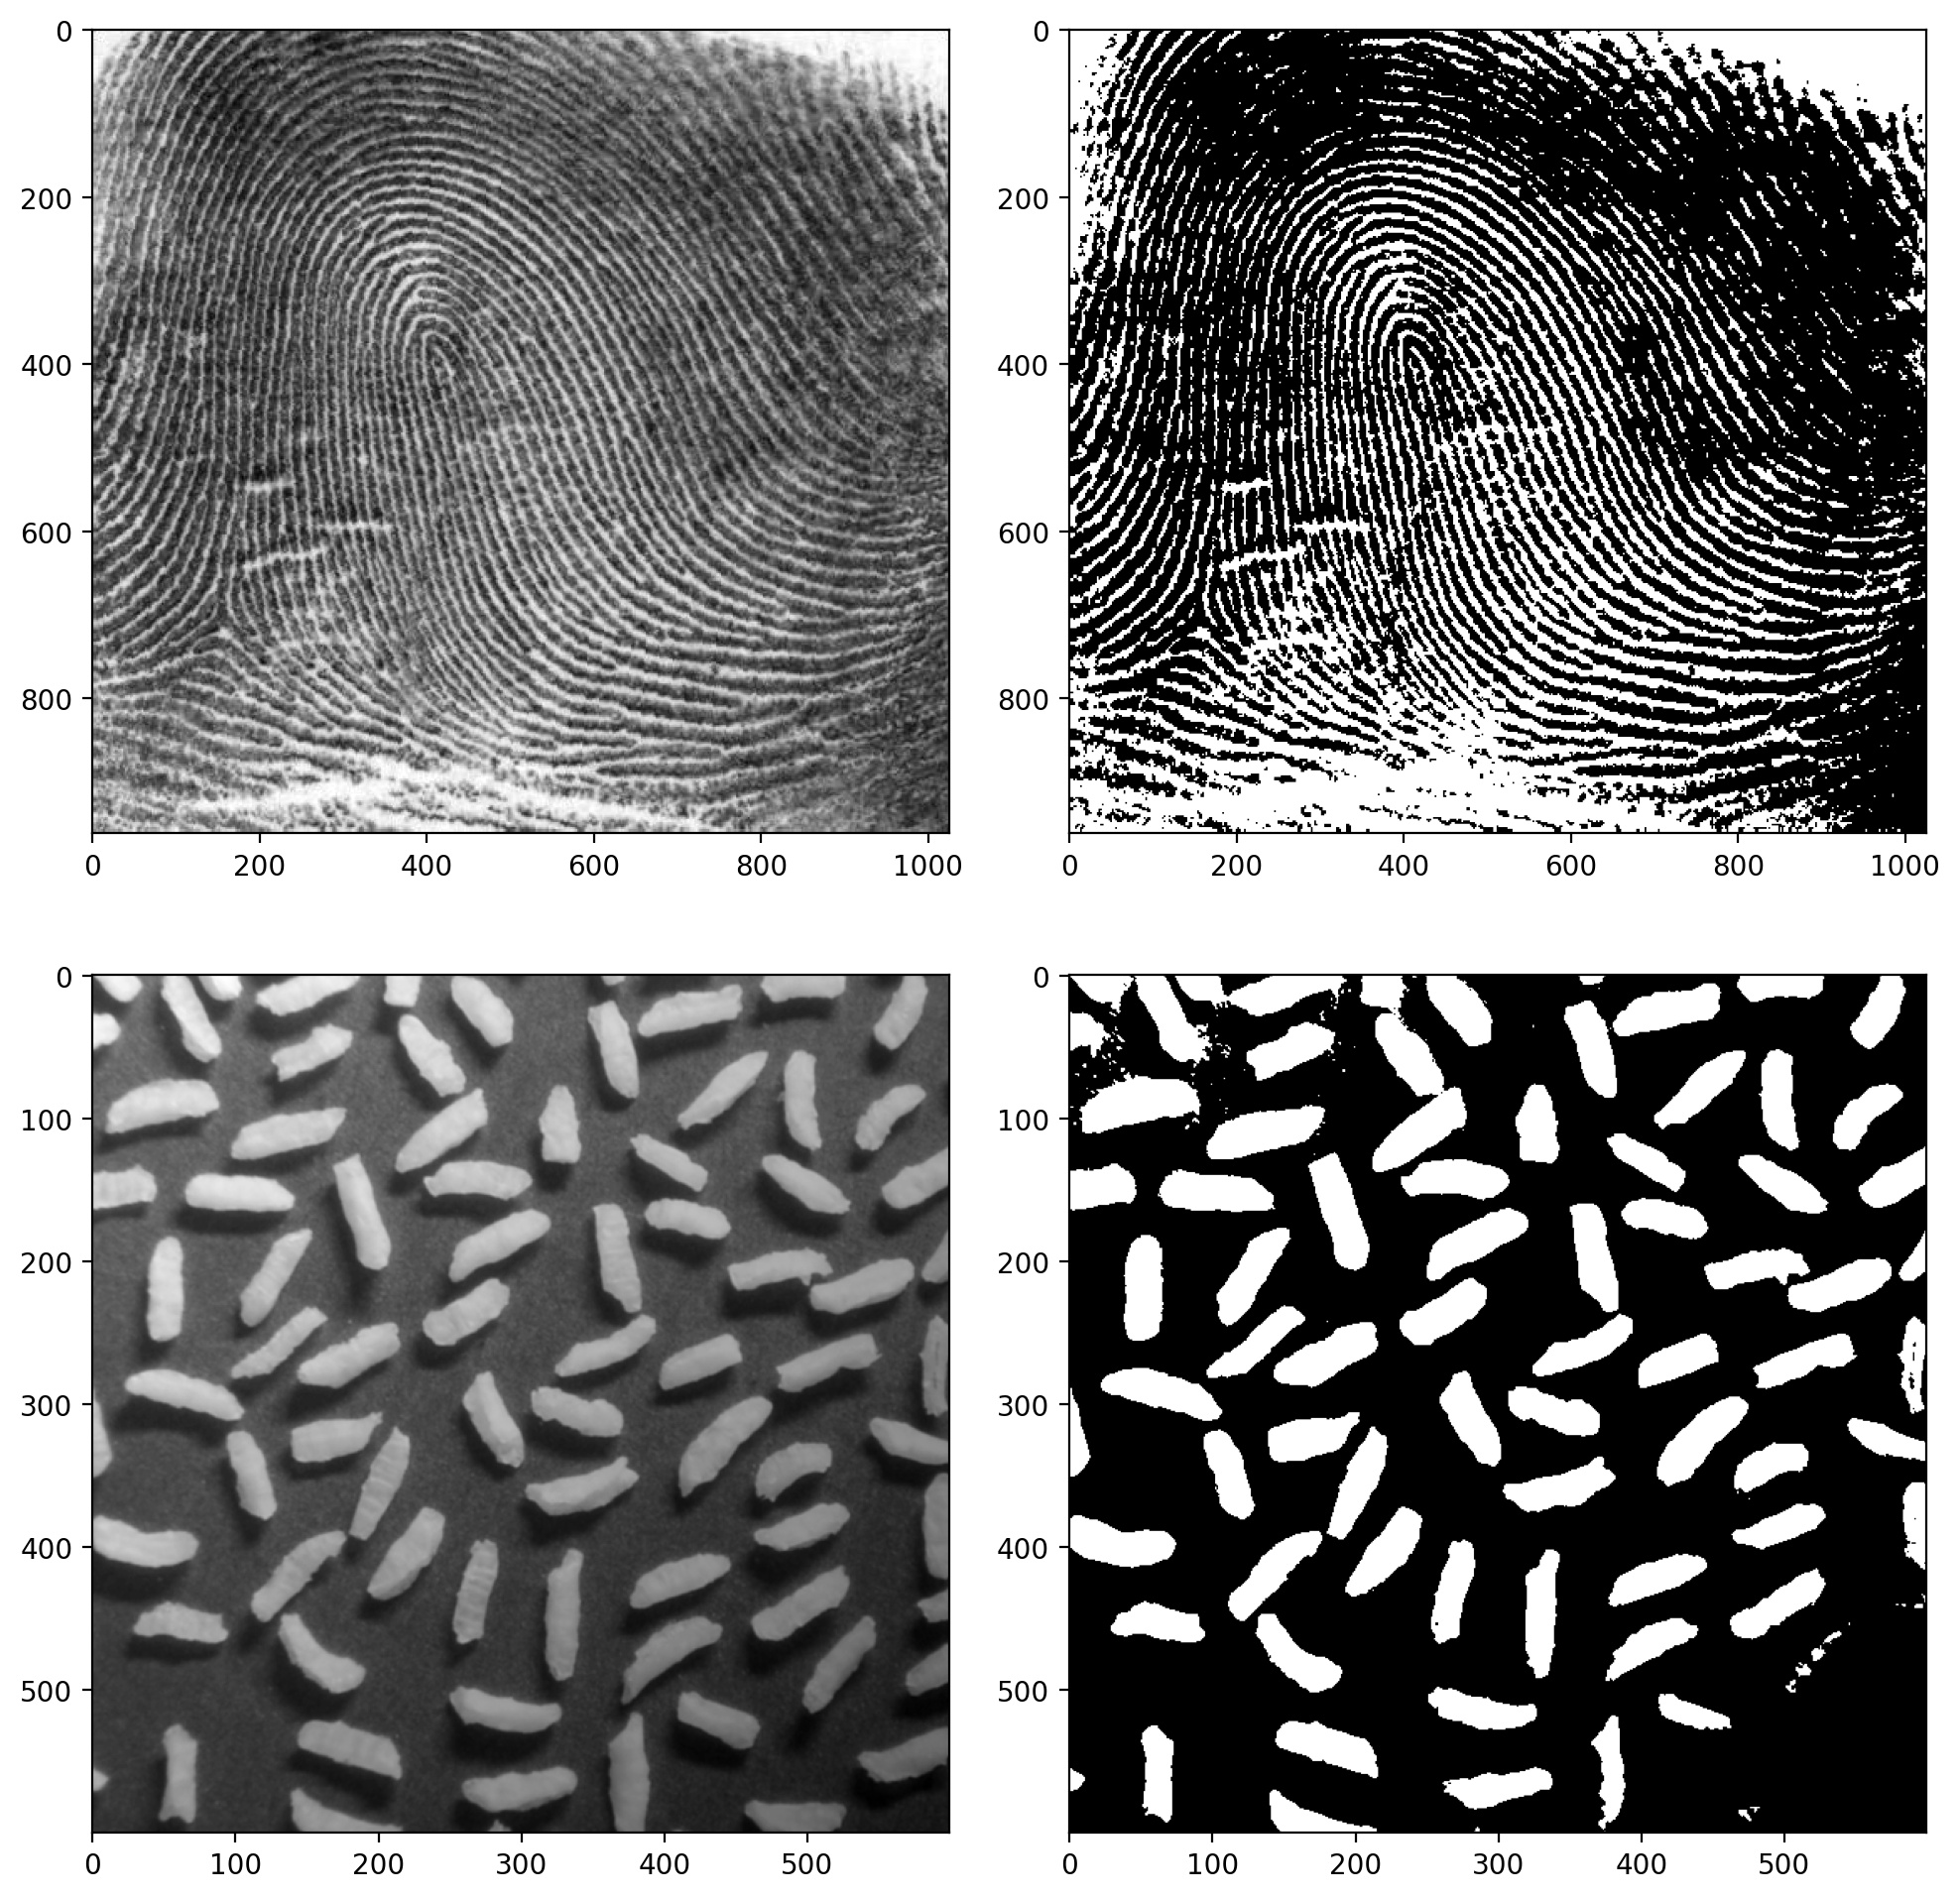

In [17]:
thumbprint = utils.read_image("thumbprint.png")
threshold = otsu_thresholding(thumbprint)
print("Found optimal threshold:", threshold)

thumbprint_segmented = utils.read_image("thumbprint-segmented.png",image_folder=pathlib.Path("image_processed"))

rice = utils.read_image("rice-shaded.png")
threshold = otsu_thresholding(rice)
print("Found optimal threshold:", threshold)

rice_segmented = utils.read_image("rice-shaded-segmented.png",image_folder=pathlib.Path("image_processed"))


plt.figure(figsize=(10,10),dpi=200)
plt.subplot(221)
plt.imshow(thumbprint,cmap="gray")
plt.subplot(222)
plt.imshow(thumbprint_segmented,cmap="gray")
plt.subplot(223)
plt.imshow(rice,cmap="gray")
plt.subplot(224)
plt.imshow(rice_segmented,cmap="gray")
plt.tight_layout()
plt.show()
